# k-Nearest Neighbor

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

* The k-NN algorithm is arguably the simplest machine learning algorithm. 
* Building the model consists only of storing the training dataset. 
* To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

# k-Neighbors classification

* In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐
bor, which is the closest training data point to the point we want to make a prediction
for. 
* The prediction is then simply the known output for this training point.

In [2]:
import mglearn

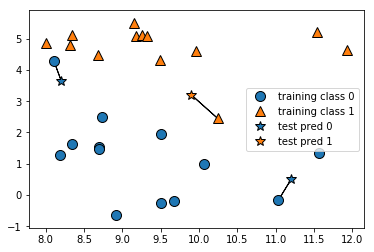

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

##### The stars show the three new datapoints added. 
##### The nearset neighbour for each of them is marked.
##### The prediction of the one-nearest-neighbor algo‐rithm is the label of that point

* Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors.
* When considering more than one neighbor, we use voting to assign a label. 
* This means that for each test point, we count how many neighbors belong toclass 0 and how many neighbors belong to class 1. 
* We then assign the class that is more frequent: in other words, the majority class among the k-nearest neighbors.

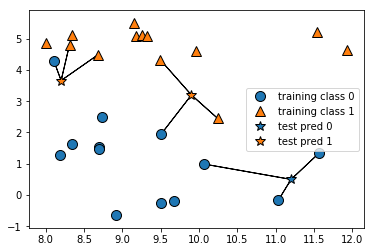

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

##### The prediction for the new data point at the top left is not the same as the prediction when we used only one neighbor. When more no of  neighbours are considered label of the most frequent class is assigned 

# k-nearest neighbors algorithm using scikit-learn .

In [6]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [12]:
clf.score(X_test, y_test)

0.8571428571428571

##### The model is about 85.7% accurate, meaning the model predicted the classcorrectly for 85.7% of the samples in the test dataset.

# Analyzing KNeighborsClassifier

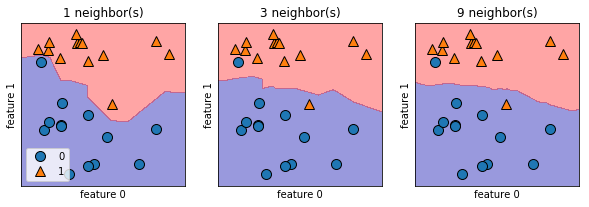

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

##### Using a single neighbor results in a decision boundary that follows the training data closely.
##### Considering more and more neigh‐bors leads to a smoother decision boundary

* A smoother boundary corresponds to a simpler model. 
* In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity.
* If we consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent in the training set.

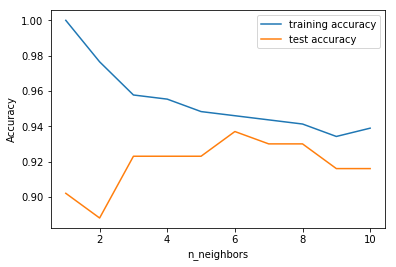

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

##### Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neigh‐bors are considered, the model becomes simpler and the training accuracy drops.
#####  The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse.
##### Its overfitting when single neighbour is considered and underfitting when 10 neighbours are considered. The best performance is somewhere in the middle.

# k-neighbors regression
* There is also a regression variant of the k-nearest neighbors algorithm

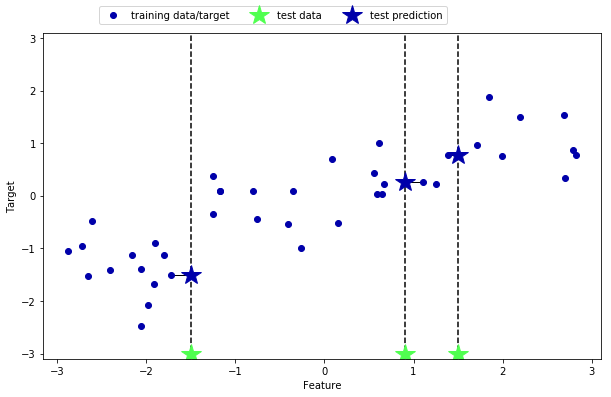

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

##### The prediction using a single neighbor is just the target value of the nearest neighbor

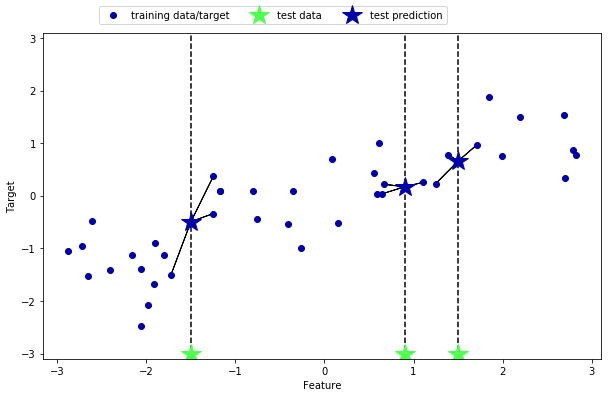

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

##### When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors

In [23]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [24]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [25]:
reg.score(X_test, y_test)

0.83441724462496036

##### Here the score is $R^2$ score and the value of 0.83 indicates a relatively good model fit

# Analyzing KNeighborsRegressor

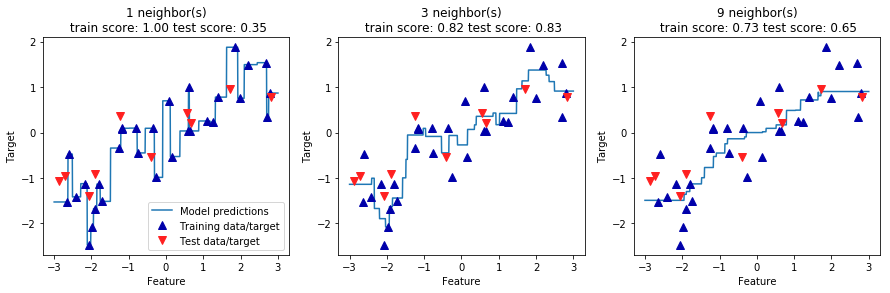

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

##### By using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

# Strengths, weaknesses, and parameters

* There are two important parameters to the KNeighbors classifier: the number of neighbors and how we measure distance between data points.
* Using a small number of neighbors like three or five often works well, but we should certainly adjust this parameter.

### Strengths:
* k-NN  model is very easy to understand and oftengives reasonable performance without a lot of adjustments.
* Building the nearest neighbors model is usually very fast

### Weaknesses:
* When the training set is very large (either in number of features or in number of samples) prediction can be slow.
* It’s important to preprocess the data before using the k-NN algorithm.
* This approach often does not perform well on datasets with many features(hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets)